Do the following on titanic dataset.

1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns 

import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

In [52]:
df=pd.read_csv(r'Downloads\titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Checking the basic details of data

In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2. Make ‘PassengerId’ as the index column

In [57]:
df.set_index('PassengerId', inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [58]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.Check the basic details of the dataset

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [60]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [62]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [63]:
df.shape

(891, 11)

### 4. Fill in all the missing values present in all the columns in the dataset

In [64]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age , cabin and embark are the missing values

In [65]:
df['Age'].fillna(round(df['Age'].mean(),1),inplace=True)
df["Cabin"].fillna(value='Not Known',inplace=True)
df["Embarked"].fillna(df["Embarked"].mode(),inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Known,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Known,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Known,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Not Known,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,Not Known,S


## 5.Check and handle outliers in at least 3 columns in the datas
OUTLIERS IN FARE

Text(0.5, 1.0, 'box plot of Fare')

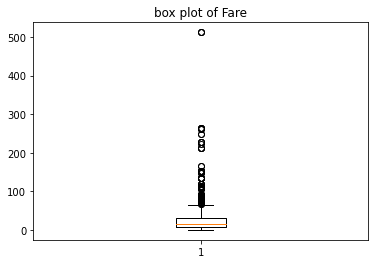

In [66]:
plt.boxplot(df['Fare'])
plt.title('box plot of Fare')

### OUTLIERS IN AGE

{'whiskers': [<matplotlib.lines.Line2D at 0x1e4e6715b20>,
 'caps': [<matplotlib.lines.Line2D at 0x1e4e6722220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e4e67157c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e4e67228e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e4e6722c40>],
 'means': []}

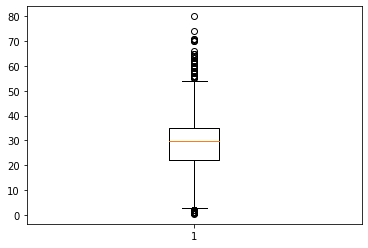

In [67]:
plt.boxplot(df['Age'])

Text(0.5, 1.0, 'box plot of Age')

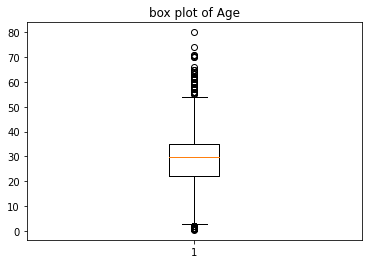

In [68]:
plt.boxplot(df['Age'])
plt.title('box plot of Age')

In [69]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)

Q1= 22.0
Q2= 29.7
Q3= 35.0


In [70]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

2.5
54.5


In [71]:
outlier=[]
for x in df['Age']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [72]:
df['Age']=np.where(df['Age']>upp_lim,upp_lim,np.where(df['Age']<low_lim,low_lim,df['Age']))
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Known,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Known,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Known,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Not Known,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,Not Known,S


Text(0.5, 1.0, 'box plot of Age')

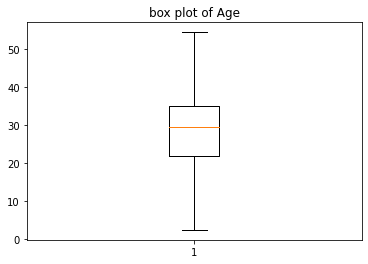

In [73]:
plt.boxplot(df['Age'])
plt.title('box plot of Age')

### OUTLIERS IN SibSp

Text(0.5, 1.0, 'box plot of SibSp')

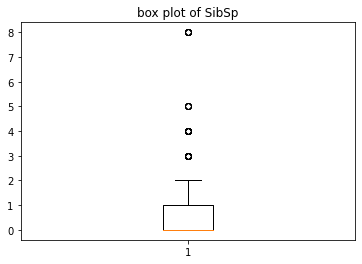

In [74]:
plt.boxplot(df['SibSp'])
plt.title('box plot of SibSp')

In [75]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)

Q1= 0.0
Q2= 0.0
Q3= 1.0


In [76]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

-1.5
2.5


In [77]:
outlier=[]
for x in df['Age']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 29.7,
 54.0,
 27.0,
 14.0,
 4.0,
 54.5,
 20.0,
 39.0,
 14.0,
 54.5,
 29.7,
 31.0,
 29.7,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 29.7,
 19.0,
 29.7,
 29.7,
 40.0,
 29.7,
 29.7,
 54.5,
 28.0,
 42.0,
 29.7,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 29.7,
 3.0,
 19.0,
 29.7,
 29.7,
 29.7,
 29.7,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 54.5,
 29.7,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 4.0,
 29.7,
 29.7,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 29.7,
 29.7,
 30.0,
 22.0,
 29.0,
 29.7,
 28.0,
 17.0,
 33.0,
 16.0,
 29.7,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 54.5,
 29.7,
 54.5,
 23.0,
 34.0,
 34.0,
 28.0,
 29.7,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 29.7,
 38.0,
 29.7,
 47.0,
 14.5,
 22.0,
 20.0,
 17.0,
 21.0,
 54.5,
 29.0,
 24.0,
 21.0,
 29.7,
 32.5,
 32.5,
 54.0,
 12.0,
 29.7,
 24.0,
 29.7,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 29.7,
 22.0,
 24.0,
 19.0,
 18.0,
 19.0,
 27.0,
 9.0,

In [78]:
df['SibSp']=np.where(df['SibSp']>upp_lim,upp_lim,np.where(df['SibSp']<low_lim,low_lim,df['SibSp']))
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,Not Known,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,Not Known,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,Not Known,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0000,Not Known,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1.0,2,W./C. 6607,23.4500,Not Known,S


Text(0.5, 1.0, 'box plot of SibSp')

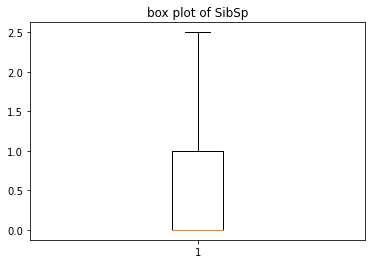

In [79]:
plt.boxplot(df['SibSp'])
plt.title('box plot of SibSp')

<AxesSubplot:xlabel='survived or not', ylabel='Passenger Count'>

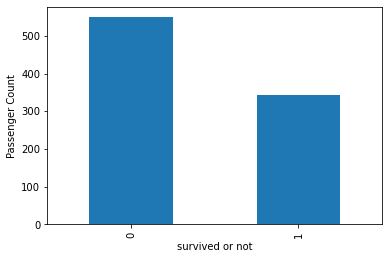

In [80]:
pt=df.Survived.value_counts().plot(kind='bar')
pt.set_xlabel('survived or not')
pt.set_ylabel('Passenger Count')
pt

{'whiskers': [<matplotlib.lines.Line2D at 0x1e4e7933400>,
 'caps': [<matplotlib.lines.Line2D at 0x1e4e7933ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e4e79330a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e4e79401c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e4e7940520>],
 'means': []}

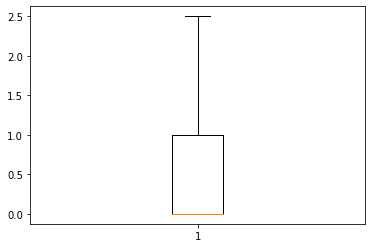

In [81]:
plt.boxplot(df['SibSp'])

In [86]:
dd4=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
dd5=pd.get_dummies(dd4)
dd5

KeyError: "['PassengerId'] not found in axis"

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [ ]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
x = minmax.fit_transform(x)
x=pd.DataFrame(x)

In [ ]:
x.describe()